In [1]:
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from nltk.stem import PorterStemmer
from nltk.stem import WordNetLemmatizer
import string
import pandas as pd
from textblob import TextBlob
from sklearn.linear_model import LogisticRegression
from sklearn.feature_extraction.text import CountVectorizer
stop_words=set(stopwords.words('english'))
from sklearn.feature_extraction.text import TfidfVectorizer

In [2]:
import pandas as pd
df=pd.read_csv(r"D:\final project\2\FinalBalancedDataset.csv")
df

,Unnamed: 0,Toxicity,tweet
0,0,0,@user when a father is dysfunctional and is s...
1,1,0,@user @user thanks for #lyft credit i can't us...
2,2,0,bihday your majesty
3,3,0,#model i love u take with u all the time in ...
4,4,0,factsguide: society now #motivation
...,...,...,...
56740,56740,1,you's a muthaf***in lie &#8220;@LifeAsKing: @2...
56741,56741,1,"you've gone and broke the wrong heart baby, an..."
56742,56742,1,young buck wanna eat!!.. dat nigguh like I ain...
56743,56743,1,youu got wild bitches tellin you lies


In [17]:
df.isna().sum()

Unnamed: 0    0
Toxicity      0
tweet         0
dtype: int64

In [19]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 56745 entries, 0 to 56744
Data columns (total 3 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   Unnamed: 0  56745 non-null  int64 
 1   Toxicity    56745 non-null  int64 
 2   tweet       56745 non-null  object
dtypes: int64(2), object(1)
memory usage: 1.3+ MB


In [3]:

stop_words=set(stopwords.words('english'))

def clean_text(texts):
    clean_texts=[]
    for text in texts:
        text=text.lower()
        tokens=word_tokenize(text)
       
        cleaned_tokens=[]
        Lemmatizer=WordNetLemmatizer()
        for word in tokens:
            if (word.isalnum()) and (not word.isdigit()) and (word not in stop_words):
                word=word.strip(string.punctuation)
                word=Lemmatizer.lemmatize(word) # remover pluer word example guys change to guy
                word=word.strip()
                cleaned_tokens.append(word)
            cleaned_text=" ".join(cleaned_tokens)
        clean_texts.append(cleaned_text)
    return clean_texts


In [4]:
df=df[['Toxicity','tweet']]
df['cleaned_text']=clean_text(df['tweet'])

df

,Toxicity,tweet,cleaned_text
0,0,@user when a father is dysfunctional and is s...,user father dysfunctional selfish drag kid dys...
1,0,@user @user thanks for #lyft credit i can't us...,user user thanks lyft credit ca use cause offe...
2,0,bihday your majesty,bihday majesty
3,0,#model i love u take with u all the time in ...,model love u take u time
4,0,factsguide: society now #motivation,factsguide society motivation
...,...,...,...
56740,1,you's a muthaf***in lie &#8220;@LifeAsKing: @2...,muthaf lie lifeasking right tl trash mine bibl...
56741,1,"you've gone and broke the wrong heart baby, an...",gone broke wrong heart baby drove redneck crazy
56742,1,young buck wanna eat!!.. dat nigguh like I ain...,young buck wan na eat dat nigguh like aint fuc...
56743,1,youu got wild bitches tellin you lies,youu got wild bitch tellin lie


In [5]:
from sklearn.decomposition import IncrementalPCA
from sklearn.feature_extraction.text import TfidfVectorizer
from scipy.sparse import csr_matrix
import pandas as pd

# Sample dataset in a Pandas DataFrame (replace this with your dataset)
X = df['cleaned_text']
y = df['Toxicity']

# Create TF-IDF vectors using TfidfVectorizer
tfidf_model = TfidfVectorizer(max_features=10000)  # Adjust max_features as needed
tfidf_vectors = tfidf_model.fit_transform(X)

# Initialize Incremental PCA with desired number of components
n_components = 10  # Adjust as needed
ipca = IncrementalPCA(n_components=n_components)

# Process TF-IDF vectors in mini-batches and fit IPCA
batch_size = 1000  # Adjust batch size according to memory constraints
for i in range(0, tfidf_vectors.shape[0], batch_size):
    batch = tfidf_vectors[i:i+batch_size].toarray()
    ipca.partial_fit(batch)

# Transform the entire dataset using IPCA
X_ipca = ipca.transform(tfidf_vectors.toarray())

# Convert the IPCA-transformed data to a DataFrame
#data = pd.DataFrame(X_ipca**2, columns=[f"PC{i}" for i in range(n_components)]) 
data = pd.DataFrame(abs(X_ipca), columns=[f"PC{i}" for i in range(n_components)])

# Add the target column to the DataFrame
data['target'] = y

# Print the DataFrame
print(data)


            PC0       PC1       PC2       PC3       PC4       PC5       PC6  \
0      0.128298  0.018397  0.037905  0.122374  0.092591  0.013604  0.000572   
1      0.181656  0.021126  0.008717  0.017658  0.011005  0.003309  0.011712   
2      0.013813  0.026569  0.044981  0.059629  0.118679  0.030596  0.065857   
3      0.045209  0.854973  0.345623  0.220070  0.144837  0.045781  0.148330   
4      0.029342  0.008339  0.025034  0.020856  0.043276  0.000388  0.013104   
...         ...       ...       ...       ...       ...       ...       ...   
56740  0.035599  0.002709  0.020804  0.020302  0.046331  0.001417  0.021634   
56741  0.036987  0.002753  0.017812  0.019677  0.036800  0.002138  0.012906   
56742  0.049049  0.016194  0.003459  0.007021  0.033032  0.002477  0.021558   
56743  0.063100  0.043797  0.029507  0.027546  0.029265  0.004350  0.001825   
56744  0.040523  0.007056  0.005140  0.010783  0.035038  0.006287  0.022662   

            PC7       PC8       PC9  target  
0    

In [6]:
data

,PC0,PC1,PC2,PC3,PC4,PC5,PC6,PC7,PC8,PC9,target
0,0.128298,0.018397,0.037905,0.122374,0.092591,0.013604,0.000572,0.027418,0.025397,0.034963,0
1,0.181656,0.021126,0.008717,0.017658,0.011005,0.003309,0.011712,0.005125,0.010513,0.000430,0
2,0.013813,0.026569,0.044981,0.059629,0.118679,0.030596,0.065857,0.087032,0.312331,0.036531,0
3,0.045209,0.854973,0.345623,0.220070,0.144837,0.045781,0.148330,0.060815,0.045819,0.006679,0
4,0.029342,0.008339,0.025034,0.020856,0.043276,0.000388,0.013104,0.005907,0.006527,0.005027,0
...,...,...,...,...,...,...,...,...,...,...,...
56740,0.035599,0.002709,0.020804,0.020302,0.046331,0.001417,0.021634,0.014056,0.004313,0.008752,1
56741,0.036987,0.002753,0.017812,0.019677,0.036800,0.002138,0.012906,0.007754,0.002824,0.006261,1
56742,0.049049,0.016194,0.003459,0.007021,0.033032,0.002477,0.021558,0.015424,0.002701,0.008246,1
56743,0.063100,0.043797,0.029507,0.027546,0.029265,0.004350,0.001825,0.001020,0.005686,0.002805,1


In [7]:
from sklearn.metrics import accuracy_score, precision_score,recall_score,f1_score,classification_report,confusion_matrix, roc_auc_score, roc_curve,auc
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.naive_bayes import MultinomialNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
import matplotlib.pyplot as plt

In [11]:
X=data.drop(['target'],axis=1)
y=data['target']

x_train,x_test,y_train,y_test=train_test_split(X,y,test_size=0.2)
models=[DecisionTreeClassifier(),SVC(),
        RandomForestClassifier(),
        MultinomialNB(),
        KNeighborsClassifier()
        ]

*********SVC********
Train Accuracy: 0.8515067406819984
Train Precision: 0.8515067406819984
Train Recall: 0.8515067406819984
Train F1 Score: 0.8515067406819984
Train_Confution matrix:
 [[24204  1859]
 [ 4882 14451]]

Test Accuracy: 0.8516168825447176
Test Precision: 0.8516168825447176
Test Recall: 0.8516168825447176
Test F1 Score: 0.8516168825447176
Test_Confution matrix:
 [[6063  466]
 [1218 3602]]
 



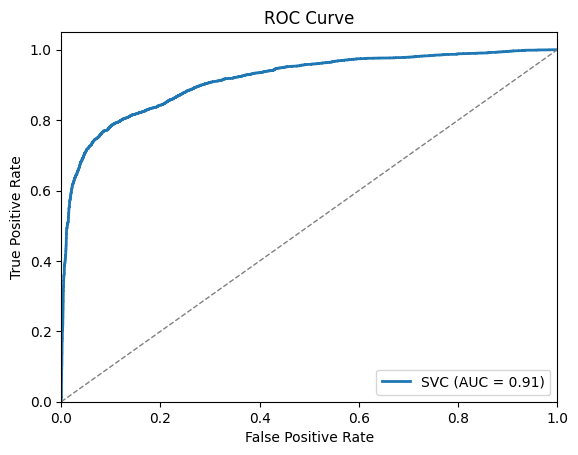

*********DecisionTreeClassifier********
Train Accuracy: 0.9991408934707904
Train Precision: 0.9991408934707904
Train Recall: 0.9991408934707904
Train F1 Score: 0.9991408934707904
Train_Confution matrix:
 [[26057     6]
 [   33 19300]]

Test Accuracy: 0.8458013921931448
Test Precision: 0.8458013921931448
Test Recall: 0.8458013921931448
Test F1 Score: 0.8458013921931448
Test_Confution matrix:
 [[5616  913]
 [ 837 3983]]
 



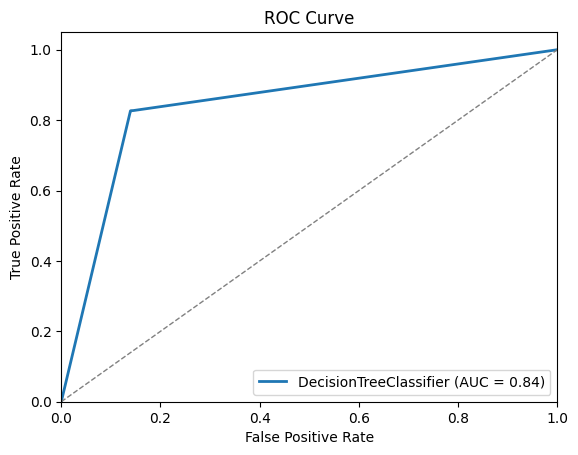

*********RandomForestClassifier********
Train Accuracy: 0.9991408934707904
Train Precision: 0.9991408934707904
Train Recall: 0.9991408934707904
Train F1 Score: 0.9991408934707904
Train_Confution matrix:
 [[26051    12]
 [   27 19306]]

Test Accuracy: 0.9005198695920346
Test Precision: 0.9005198695920346
Test Recall: 0.9005198695920346
Test F1 Score: 0.9005198695920346
Test_Confution matrix:
 [[6124  405]
 [ 724 4096]]
 



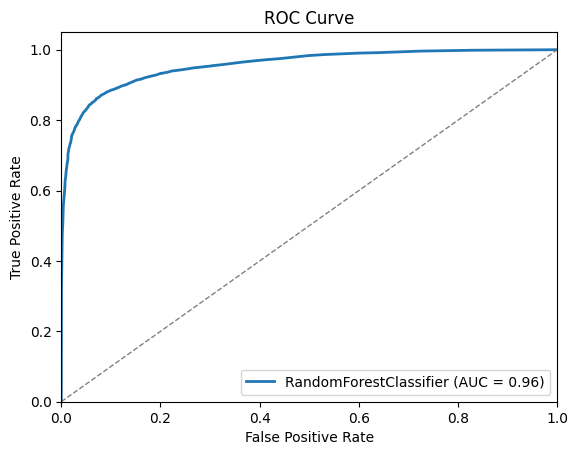

*********MultinomialNB********
Train Accuracy: 0.5741254736100097
Train Precision: 0.5741254736100097
Train Recall: 0.5741254736100097
Train F1 Score: 0.5741254736100097
Train_Confution matrix:
 [[26063     0]
 [19333     0]]

Test Accuracy: 0.575292977354833
Test Precision: 0.575292977354833
Test Recall: 0.575292977354833
Test F1 Score: 0.575292977354833
Test_Confution matrix:
 [[6529    0]
 [4820    0]]
 



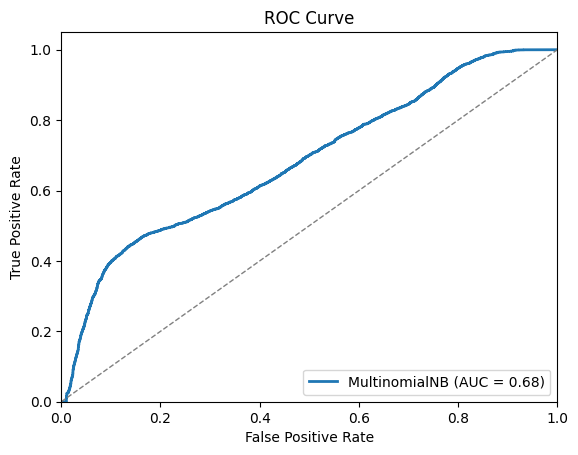

*********KNeighborsClassifier********
Train Accuracy: 0.9125033042558816
Train Precision: 0.9125033042558816
Train Recall: 0.9125033042558816
Train F1 Score: 0.9125033042558816
Train_Confution matrix:
 [[24599  1464]
 [ 2508 16825]]

Test Accuracy: 0.8867741651246805
Test Precision: 0.8867741651246805
Test Recall: 0.8867741651246805
Test F1 Score: 0.8867741651246805
Test_Confution matrix:
 [[6022  507]
 [ 778 4042]]
 



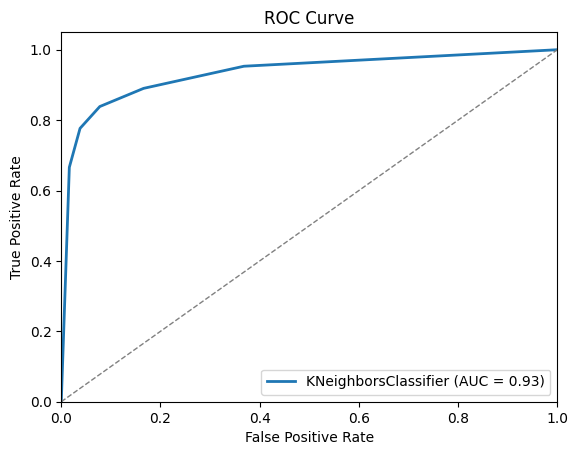

In [19]:
for model in models:
    model.fit(x_train,y_train)
    train_pred = model.predict(x_train)
    test_pred = model.predict(x_test)

    if hasattr(model, "predict_proba"):
        y_train_pred_proba = model.predict_proba(x_train)[:, 1]
        y_test_pred_proba = model.predict_proba(x_test)[:, 1]
    else:
        y_train_pred_proba = model.decision_function(x_train)
        y_test_pred_proba=model.decision_function(x_test)
    fpr_train, tpr_train, _ = roc_curve(y_train, y_train_pred_proba)
    fpr_test, tpr_test, _ = roc_curve(y_test, y_test_pred_proba)
    roc_auc_train = auc(fpr_train, tpr_train)
    roc_auc_test = auc(fpr_test, tpr_test)
    plt.plot(fpr_test, tpr_test, lw=2, label=f'{model.__class__.__name__} (AUC = {roc_auc_test:.2f})')
    
    plt.plot([0, 1], [0, 1], color='gray', lw=1, linestyle='--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('ROC Curve')
    plt.legend(loc="lower right")
    

    print(f"*********{type(model).__name__}********")
    print(f"Train Accuracy: {accuracy_score(y_train,train_pred)}")
    print(f"Train Precision: {precision_score(y_train,train_pred,average='micro')}")
    print(f"Train Recall: {recall_score(y_train,train_pred,average='micro')}")
    print(f"Train F1 Score: {f1_score(y_train,train_pred,average='micro')}")
    print(f"Train_Confution matrix:\n {confusion_matrix(y_train,train_pred)}\n")

    print(f"Test Accuracy: {accuracy_score(y_test,test_pred)}")
    print(f"Test Precision: {precision_score(y_test,test_pred,average='micro')}")
    print(f"Test Recall: {recall_score(y_test,test_pred,average='micro')}")
    print(f"Test F1 Score: {f1_score(y_test,test_pred,average='micro')}")
    print(f"Test_Confution matrix:\n {confusion_matrix(y_test,test_pred)}\n \n")
    plt.show()
